Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [1]:
import zipfile

# Path to the already downloaded zip file
zip_file_path = "10_food_classes_all_data.zip"

# Unzip the downloaded file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall()

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # Show the shape of the image

    return img

['1879189.jpg']
Image shape: (512, 512, 3)


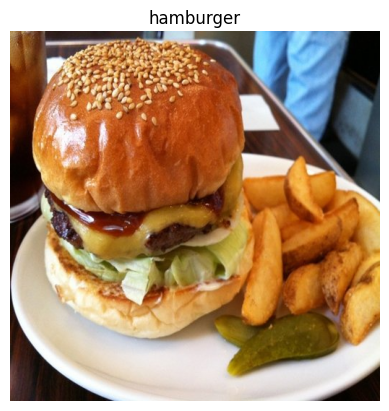

In [8]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))


# Preprocess the data

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
# Creating a model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

In [12]:
model_1 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3),
    MaxPooling2D(),
    Conv2D(10, 3),
    Conv2D(10, 3),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="sigmoid")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_1 = model_1.fit(train_data, epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
235/235 [==============================] - 110s 455ms/step - loss: 2.0762 - accuracy: 0.2667 - val_loss: 1.9345 - val_accuracy: 0.3084
Epoch 2/10
235/235 [==============================] - 31s 132ms/step - loss: 1.7861 - accuracy: 0.3825 - val_loss: 1.9412 - val_accuracy: 0.3204
Epoch 3/10
235/235 [==============================] - 33s 138ms/step - loss: 1.4098 - accuracy: 0.5340 - val_loss: 2.1943 - val_accuracy: 0.3036
Epoch 4/10
235/235 [==============================] - 33s 139ms/step - loss: 0.7105 - accuracy: 0.7781 - val_loss: 2.6623 - val_accuracy: 0.2628
Epoch 5/10
235/235 [==============================] - 35s 149ms/step - loss: 0.1979 - accuracy: 0.9461 - val_loss: 4.0130 - val_accuracy: 0.2540
Epoch 6/10
235/235 [==============================] - 37s 155ms/step - loss: 0.0530 - accuracy: 0.9887 - val_loss: 5.0589 - val_accuracy: 0.2580
Epoch 7/10
235/235 [==============================] - 36s 154ms/step - loss: 0.0186 - accuracy: 0.9967 - val_loss: 5.5875 - val_a

In [13]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

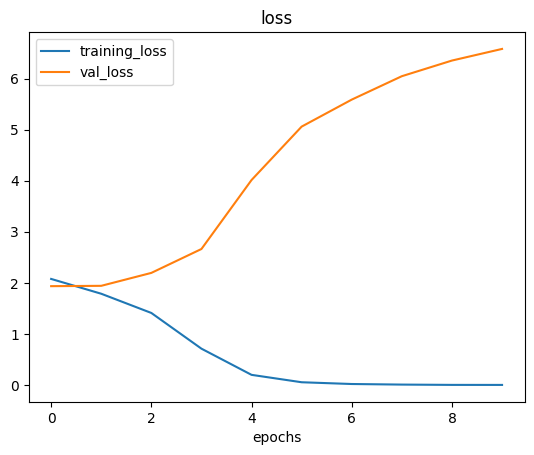

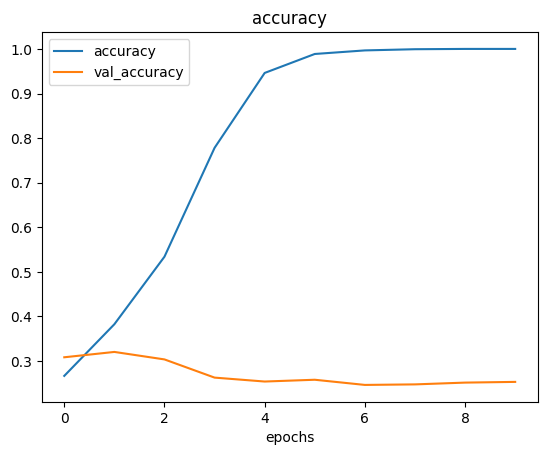

In [14]:
plot_loss_curves(history_1)

Text(0.5, 1.0, 'Learning rate vs Loss')

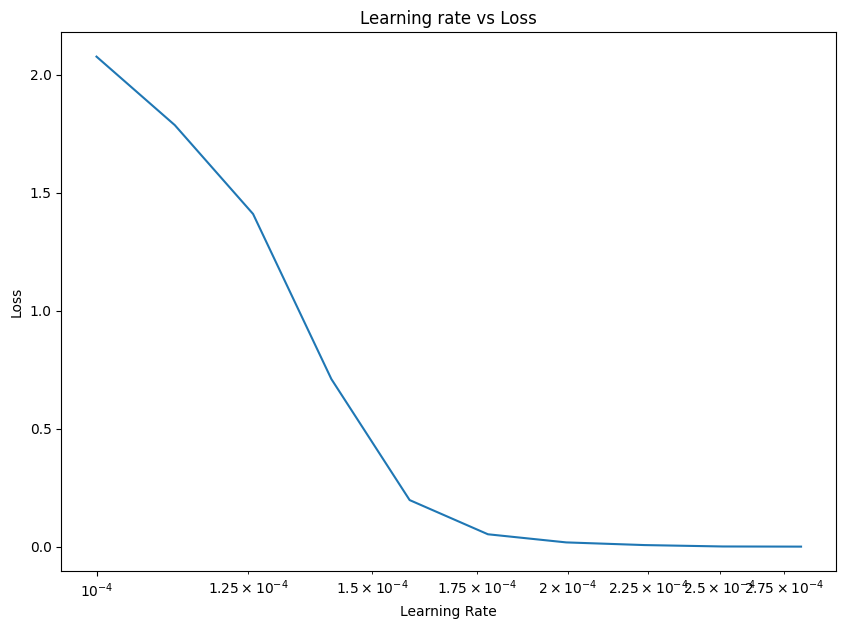

In [16]:
lrs = 1e-4 * (10 ** (tf.range(len(history_1.history['loss']))/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_1.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

Text(0.5, 1.0, 'Loss vs Epoch')

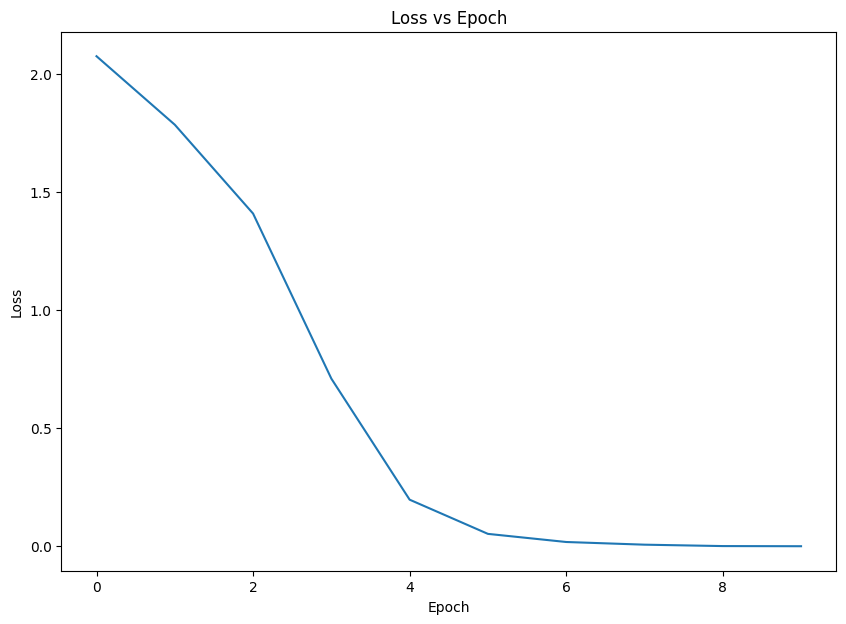

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(history_1.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")

In [18]:
model_2 = Sequential([
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3),
    MaxPooling2D(),
    Conv2D(10, 3),
    Conv2D(10, 3),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="sigmoid")
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(learning_rate=0.000125),
                metrics=["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_2 = model_2.fit(train_data, epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
235/235 [==============================] - 35s 145ms/step - loss: 2.0891 - accuracy: 0.2469 - val_loss: 1.9646 - val_accuracy: 0.3092
Epoch 2/10
235/235 [==============================] - 36s 152ms/step - loss: 1.8915 - accuracy: 0.3513 - val_loss: 1.9286 - val_accuracy: 0.3192
Epoch 3/10
235/235 [==============================] - 33s 141ms/step - loss: 1.7996 - accuracy: 0.3851 - val_loss: 1.9131 - val_accuracy: 0.3276
Epoch 4/10
235/235 [==============================] - 39s 164ms/step - loss: 1.7004 - accuracy: 0.4307 - val_loss: 1.9049 - val_accuracy: 0.3364
Epoch 5/10
235/235 [==============================] - 43s 182ms/step - loss: 1.5925 - accuracy: 0.4736 - val_loss: 1.9046 - val_accuracy: 0.3268
Epoch 6/10
235/235 [==============================] - 39s 164ms/step - loss: 1.4592 - accuracy: 0.5313 - val_loss: 1.9586 - val_accuracy: 0.3104
Epoch 7/10
235/235 [==============================] - 43s 183ms/step - loss: 1.2826 - accuracy: 0.5955 - val_loss: 2.0462 - val_ac

In [19]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 2.7553 - accuracy: 0.2712


[2.755312204360962, 0.2712000012397766]

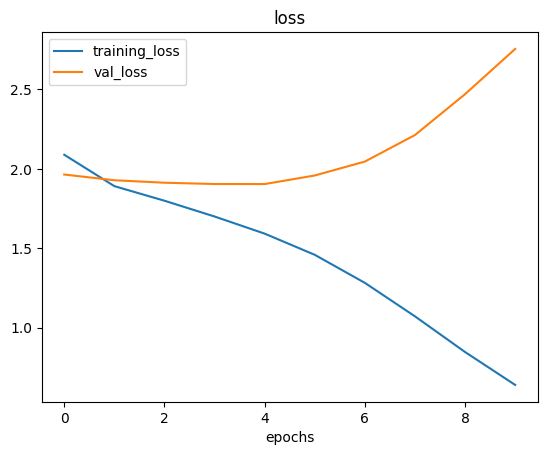

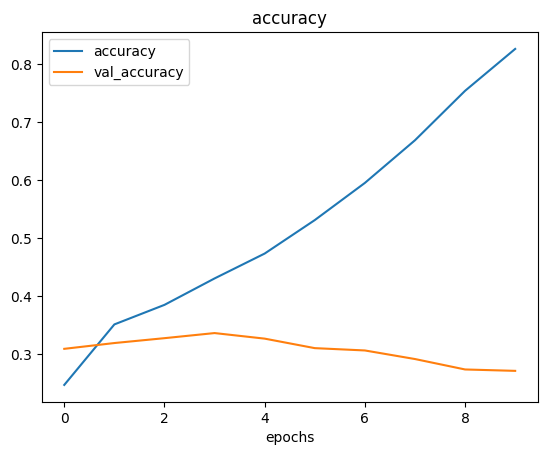

In [20]:
plot_loss_curves(history_2)